In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Verify gpu is being used
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
#Paths to datasets
import pathlib
data_dir = pathlib.Path(pathlib.Path.cwd()) / "datasets"
data1_dir = data_dir / "data1"
data2_dir = data_dir / "data2"
data3_dir = data_dir / "data3"
print(data_dir)
print(data1_dir)
print(data2_dir)
print(data3_dir)

C:\Users\mcs52\Desktop\CS3840-Final-Project\datasets
C:\Users\mcs52\Desktop\CS3840-Final-Project\datasets\data1
C:\Users\mcs52\Desktop\CS3840-Final-Project\datasets\data2
C:\Users\mcs52\Desktop\CS3840-Final-Project\datasets\data3


In [4]:
#Parameters for datasets
batch_size = 32
img_height = 256
img_width = 256
model_seed = 5151
validation_split = .5

In [5]:
#Datasets for training from 1st dataset

train_ds1 = tf.keras.utils.image_dataset_from_directory(
data1_dir,
validation_split=validation_split,
subset="training",
seed=model_seed,
image_size = (img_height, img_width),
batch_size = batch_size)

val_ds1 = tf.keras.utils.image_dataset_from_directory(
data1_dir,
validation_split=validation_split,
subset="validation",
seed=model_seed,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 1289 files belonging to 2 classes.
Using 645 files for training.
Found 1289 files belonging to 2 classes.
Using 644 files for validation.


In [6]:
#Datasets for training from 2nd dataset

train_ds2 = tf.keras.utils.image_dataset_from_directory(
data2_dir,
validation_split=validation_split,
subset="training",
seed=model_seed,
image_size = (img_height, img_width),
batch_size = batch_size)

val_ds2 = tf.keras.utils.image_dataset_from_directory(
data2_dir,
validation_split=validation_split,
subset="validation",
seed=model_seed,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 20000 files belonging to 2 classes.
Using 10000 files for training.
Found 20000 files belonging to 2 classes.
Using 10000 files for validation.


In [7]:
#Datasets for training from 3rd dataset

train_ds3 = tf.keras.utils.image_dataset_from_directory(
data3_dir,
validation_split=validation_split,
subset="training",
seed=model_seed,
image_size = (img_height, img_width),
batch_size = batch_size)

val_ds3 = tf.keras.utils.image_dataset_from_directory(
data3_dir,
validation_split=validation_split,
subset="validation",
seed=model_seed,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 2041 files belonging to 2 classes.
Using 1021 files for training.
Found 2041 files belonging to 2 classes.
Using 1020 files for validation.


In [ ]:
#TODO TAKE SLICES FROM TRAINING DATASETS AND CREATE NEW COMBINED DATASET
#TODO TAKE SLICES FROM VALIDATION DATASETS AND CREATE NEW COMBINED DATASET

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds1 = train_ds1.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds1 = val_ds1.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds2 = train_ds2.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds2 = val_ds2.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds3 = train_ds3.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds3 = val_ds3.cache().prefetch(buffer_size=AUTOTUNE)



In [ ]:
#TODO AUTOTUNE SPLICED DATASET

#AUTOTUNE = tf.data.AUTOTUNE

#train_ds4 = train_ds4.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds4 = val_ds4.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
class_names = ['fake', 'real']

num_classes = len(class_names)

#EDIT MODEL TO FIND EFFECTIVE VERSION
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [12]:
#Look at parameters and potentially change
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [16]:
epochs=10

#Change train and val sets depending on datarun
history = model.fit(
  train_ds2,
  validation_data=val_ds2,
  epochs=epochs
)


Epoch 1/10
313/313 [==============================] - 31s 92ms/step - loss: 0.7006 - accuracy: 0.5638 - val_loss: 0.5910 - val_accuracy: 0.6935
Epoch 2/10
313/313 [==============================] - 28s 89ms/step - loss: 0.5674 - accuracy: 0.7084 - val_loss: 0.5423 - val_accuracy: 0.7350
Epoch 3/10
313/313 [==============================] - 29s 91ms/step - loss: 0.4386 - accuracy: 0.8029 - val_loss: 0.5151 - val_accuracy: 0.7557
Epoch 4/10
313/313 [==============================] - 29s 91ms/step - loss: 0.2973 - accuracy: 0.8731 - val_loss: 0.6003 - val_accuracy: 0.7500
Epoch 5/10
313/313 [==============================] - 28s 90ms/step - loss: 0.2131 - accuracy: 0.9096 - val_loss: 0.6577 - val_accuracy: 0.7683
Epoch 6/10
313/313 [==============================] - 28s 91ms/step - loss: 0.1298 - accuracy: 0.9532 - val_loss: 0.8815 - val_accuracy: 0.7818
Epoch 7/10
313/313 [==============================] - 28s 90ms/step - loss: 0.0927 - accuracy: 0.9669 - val_loss: 0.8527 - val_accuracy:

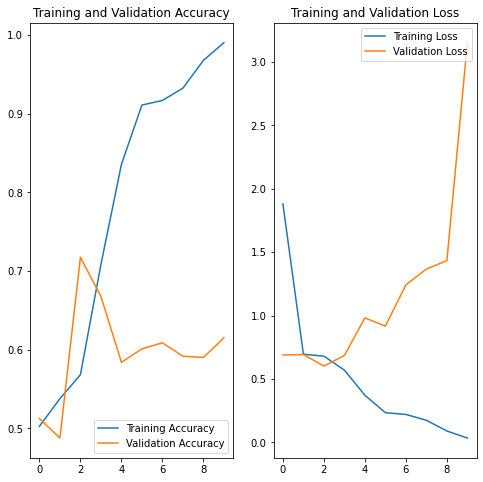

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
